<a href="https://colab.research.google.com/github/KodumuruRaja/Performance-Metrics/blob/main/Performance-Metrics%20of%20Classification(AUC%2C%20ROC%20Curves).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import make_classification

In [ ]:
from sklearn.model_selection import train_test_split
x,y=make_classification(n_samples=2000,n_classes=2,weights=[1,1],random_state=1)

In [ ]:
x.shape,y.shape

((2000, 20), (2000,))

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
# Applying RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
ytrain_pred=rf.predict_proba(x_train)
print('Rf train roc_auc : {}'.format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred=rf.predict_proba(x_test)
print('RF test roc_auc: {}'.format(roc_auc_score(y_test,ytest_pred[:,1])))

Rf train roc_auc : 1.0
RF test roc_auc: 0.9831833333333333


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(x_train, y_train)
ytrain_pred = log_classifier.predict_proba(x_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(x_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


In [ ]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(x_train, y_train)
ytrain_pred = ada_classifier.predict_proba(x_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(x_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


In [ ]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)
ytrain_pred = knn_classifier.predict_proba(x_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(x_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


# Now we focus on selecting the best threshold for maximum accuracy

In [ ]:
pred=[]
for model in [rf,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(x_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9849111111111112


In [ ]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.98,0.991861,0.559186,1.0
1,0.03,0.000008,0.463282,0.0
2,0.97,0.966929,0.538202,0.8
3,0.95,0.761539,0.509875,0.8
4,0.55,0.779443,0.490344,0.4
...,...,...,...,...
595,0.01,0.024239,0.461121,0.0
596,0.05,0.000003,0.441377,0.0
597,1.00,0.984385,0.532403,1.0
598,0.02,0.001147,0.441720,0.2


In [ ]:
final_prediction

0      0.882762
1      0.123323
2      0.818783
3      0.755353
4      0.554947
         ...   
595    0.123840
596    0.122845
597    0.879197
598    0.165717
599    0.837357
Length: 600, dtype: float64

In [ ]:
# Calculate the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.9134413 , 0.9134413 , 0.90873256, 0.90827475, 0.79836092,
       0.7980558 , 0.79225303, 0.79162833, 0.78173524, 0.78071156,
       0.77561406, 0.77287124, 0.74479835, 0.74387362, 0.70201656,
       0.69893711, 0.66692282, 0.66493537, 0.60029968, 0.59364346,
       0.5896569 , 0.58925354, 0.58712652, 0.58300386, 0.58146627,
       0.57736186, 0.55292732, 0.53889283, 0.53345371, 0.52627948,
       0.51855932, 0.49866892, 0.45169266, 0.44294916, 0.4321034 ,
       0.38184818, 0.38129719, 0.34886723, 0.34836612, 0.24154122,
       0.23890421, 0.2296341 , 0.22896893, 0.21207968, 0.20848417,
       0.12284501, 0.1228351 , 0.10498954])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()


,thresholds,accuracy
33,0.442949,0.961667
34,0.432103,0.960000
32,0.451693,0.960000
31,0.498669,0.958333
30,0.518559,0.956667


In [ ]:
accuracy_ls

,thresholds,accuracy
33,0.442949,0.961667
34,0.432103,0.960000
32,0.451693,0.960000
31,0.498669,0.958333
30,0.518559,0.956667
26,0.552927,0.956667
29,0.526279,0.956667
27,0.538893,0.956667
28,0.533454,0.955000
25,0.577362,0.948333


In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

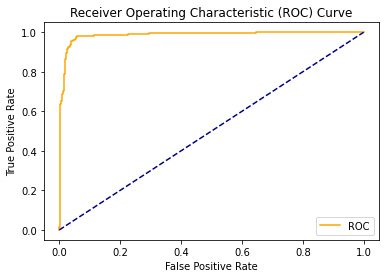

In [ ]:
plot_roc_curve(fpr,tpr)